## Simple and Multi Linear Regression

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [162]:
df = r"C:\Users\maria\OneDrive\Desktop\Prokoders\Maria's\Machine Learning\Linear Regression\Food_Delivery_Times.csv"

In [164]:
df = pd.read_csv(df)

In [166]:
print(df.head())  

print(df.info())  
print(df.describe())  

   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  N

In [168]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean())

df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

print(df.isnull().sum())

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


In [170]:
le = LabelEncoder()

In [172]:
encoded_weather = le.fit_transform(df['Weather'])

In [174]:
encoded_traffic = le.fit_transform(df['Traffic_Level'])
encoded_Time_of_Day = le.fit_transform(df['Time_of_Day'])
encoded_Vehicle_Type = le.fit_transform(df['Vehicle_Type'])


In [176]:
encoded_traffic = le.fit_transform(df['Traffic_Level'])


In [178]:
df_encoded['Traffic_Level'] = encoded_traffic


In [180]:
df_encoded = df.copy()

df_encoded['Traffic_Level'] = encoded_traffic
df_encoded['Weather'] = encoded_weather
df_encoded['Time_of_Day'] = encoded_Time_of_Day
df_encoded['Vehicle_Type'] = encoded_Vehicle_Type



In [182]:
def correlation_analysis(df, target_column):
    correlation_matrix = df.corr()
    
    correlations_with_target = correlation_matrix[target_column].sort_values(ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    print("\nCorrelations with target variable:")
    print(correlations_with_target)
    
    return correlations_with_target

def visual_analysis(df, target_column):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    features = [col for col in numerical_columns if col != target_column]
    
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Feature vs Target Variable', fontsize=16)
    
    axes = axes.flatten()
    
    for idx, feature in enumerate(features):
        # Scatter plot
        axes[idx].scatter(df[feature], df[target_column], alpha=0.5)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel(target_column)
        
        z = np.polyfit(df[feature], df[target_column], 1)
        p = np.poly1d(z)
        axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8)
        
        corr = df[feature].corr(df[target_column])
        axes[idx].set_title(f'{feature} (correlation: {corr:.2f})')
    
    for idx in range(n_features, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(15, 5*n_rows))
    for idx, feature in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, idx)
        sns.kdeplot(data=df, x=feature)
        plt.title(f'Distribution of {feature}')
    
    plt.tight_layout()
    plt.show()

def analyze_relationships(df, target_column):
    print("=== Correlation Analysis ===")
    correlations = correlation_analysis(df, target_column)
    
    print("\n=== Visual Analysis ===")
    visual_analysis(df, target_column)
    
    return correlations



=== Correlation Analysis ===


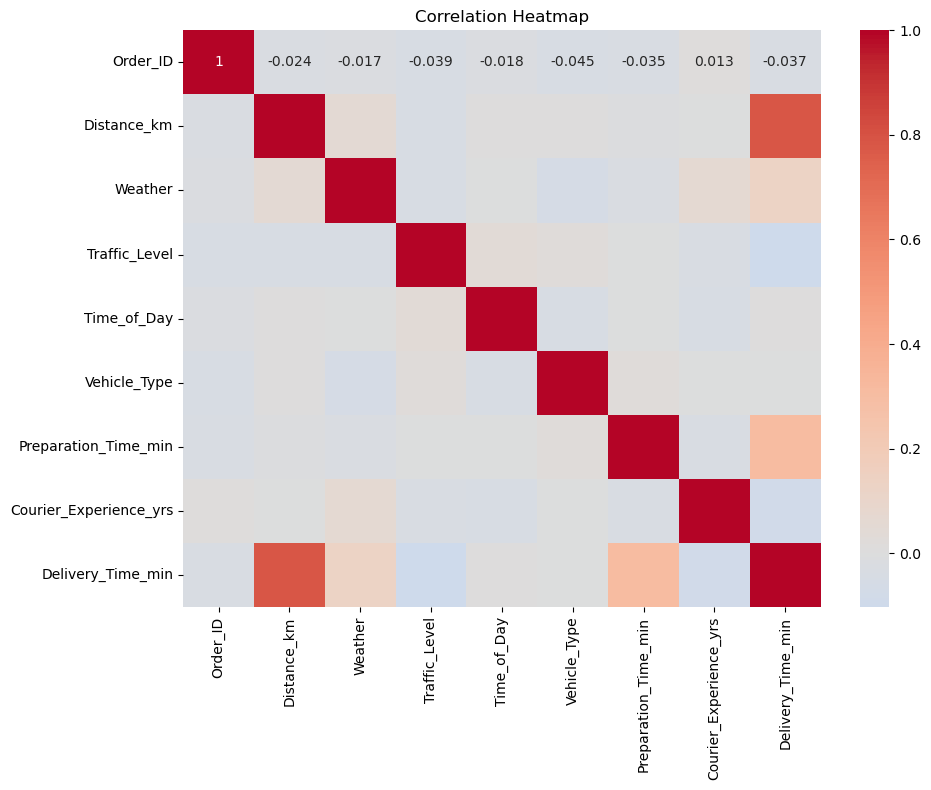


Correlations with target variable:
Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Weather                   0.132867
Time_of_Day               0.000998
Vehicle_Type             -0.006629
Order_ID                 -0.036650
Courier_Experience_yrs   -0.089066
Traffic_Level            -0.102813
Name: Delivery_Time_min, dtype: float64

=== Visual Analysis ===


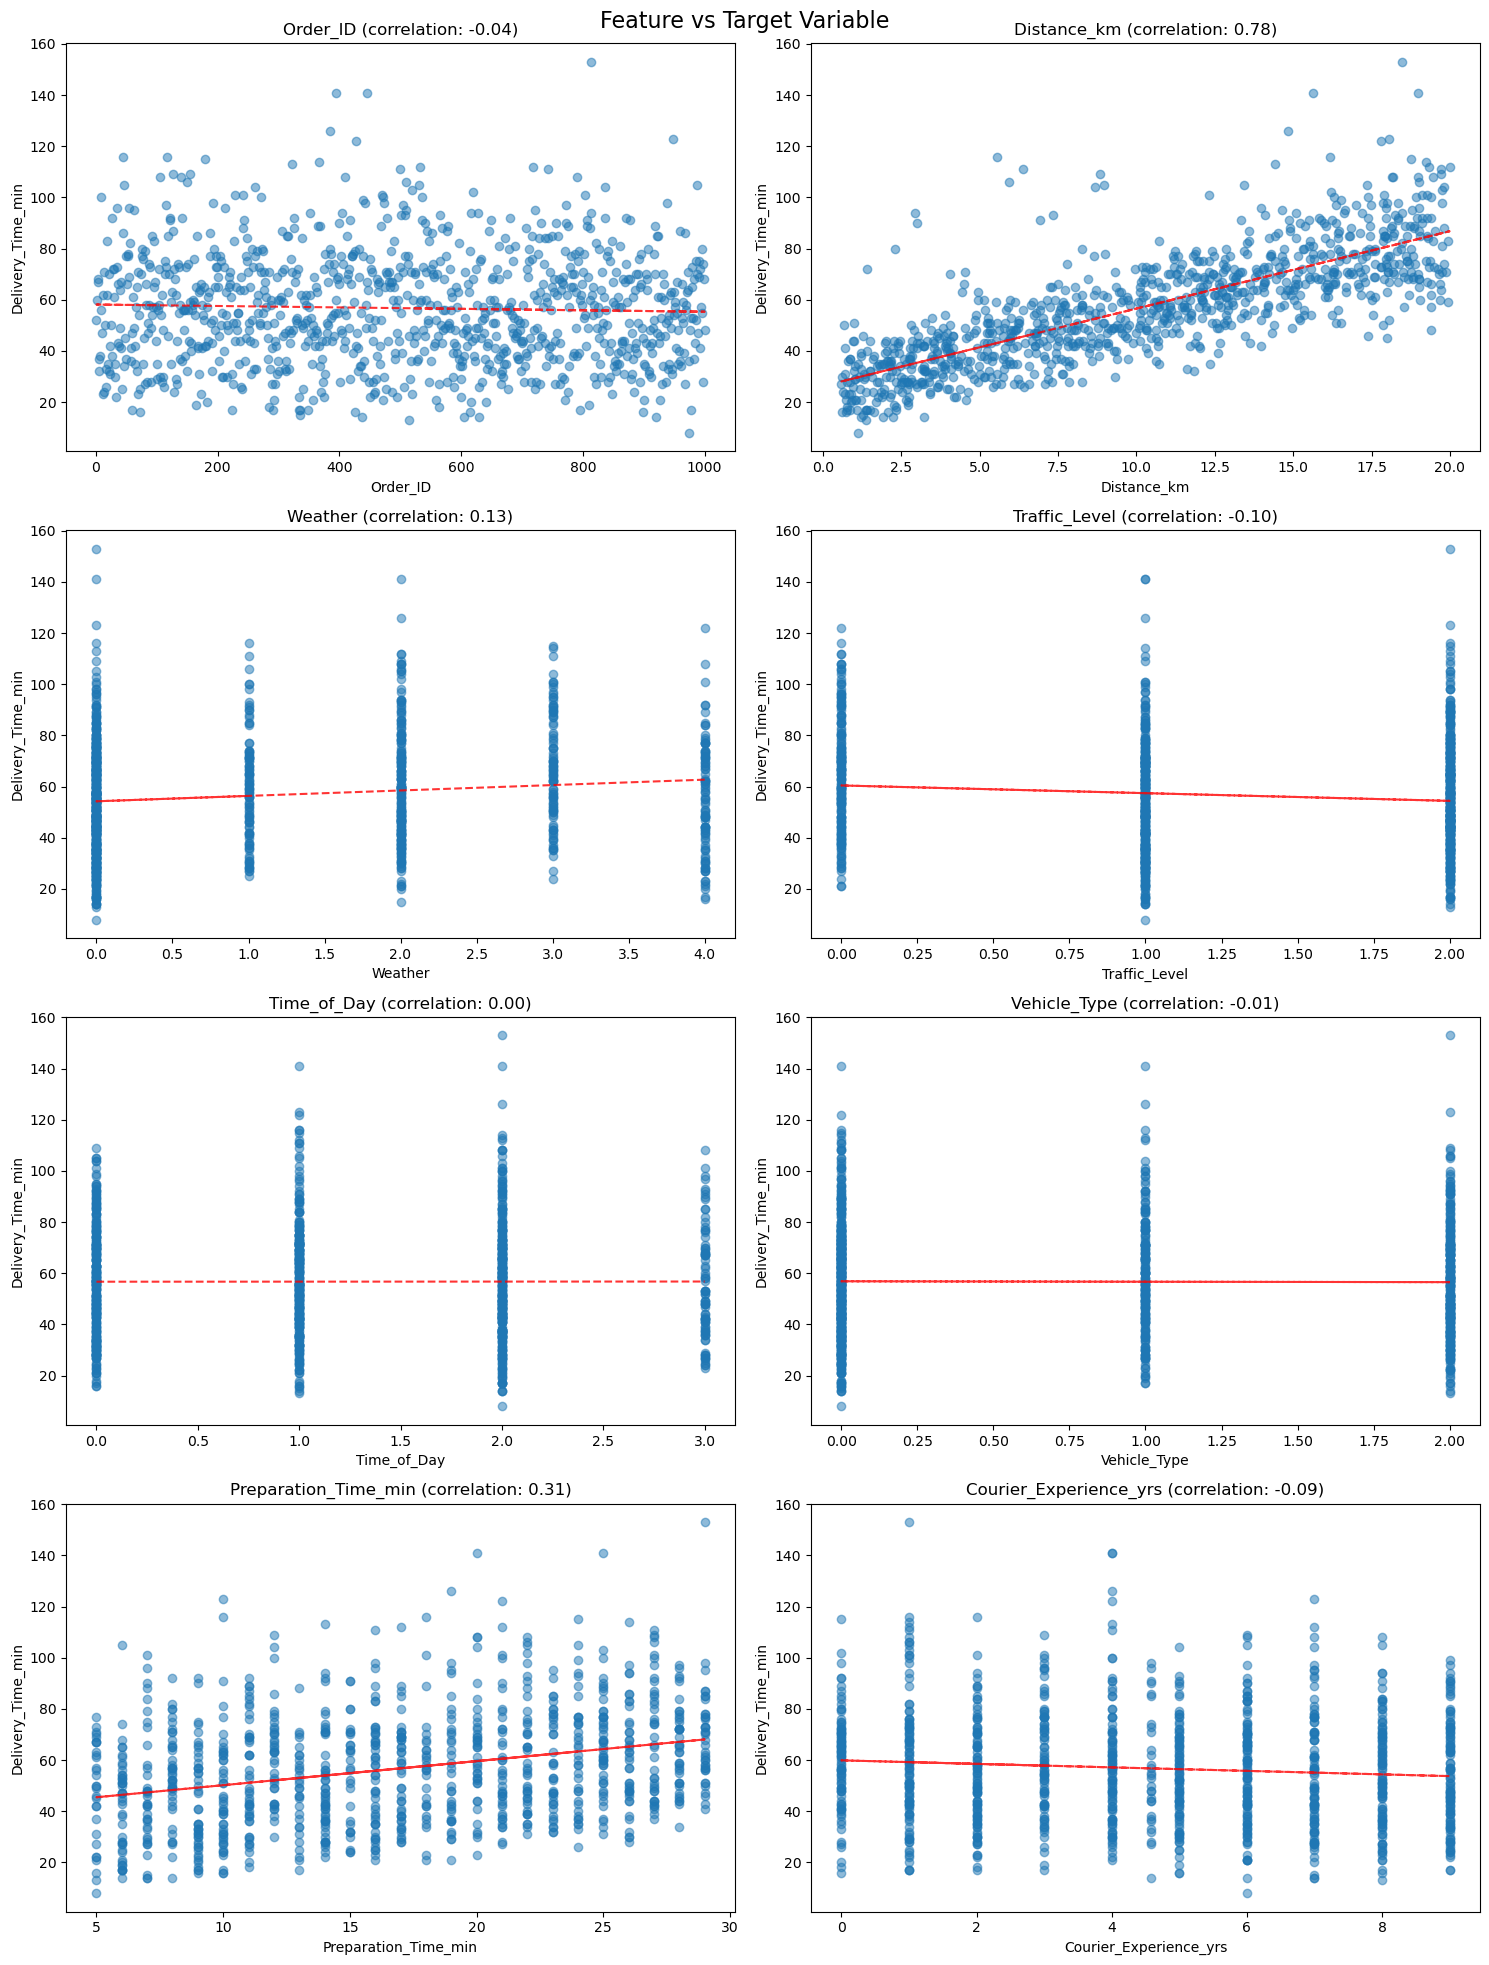

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

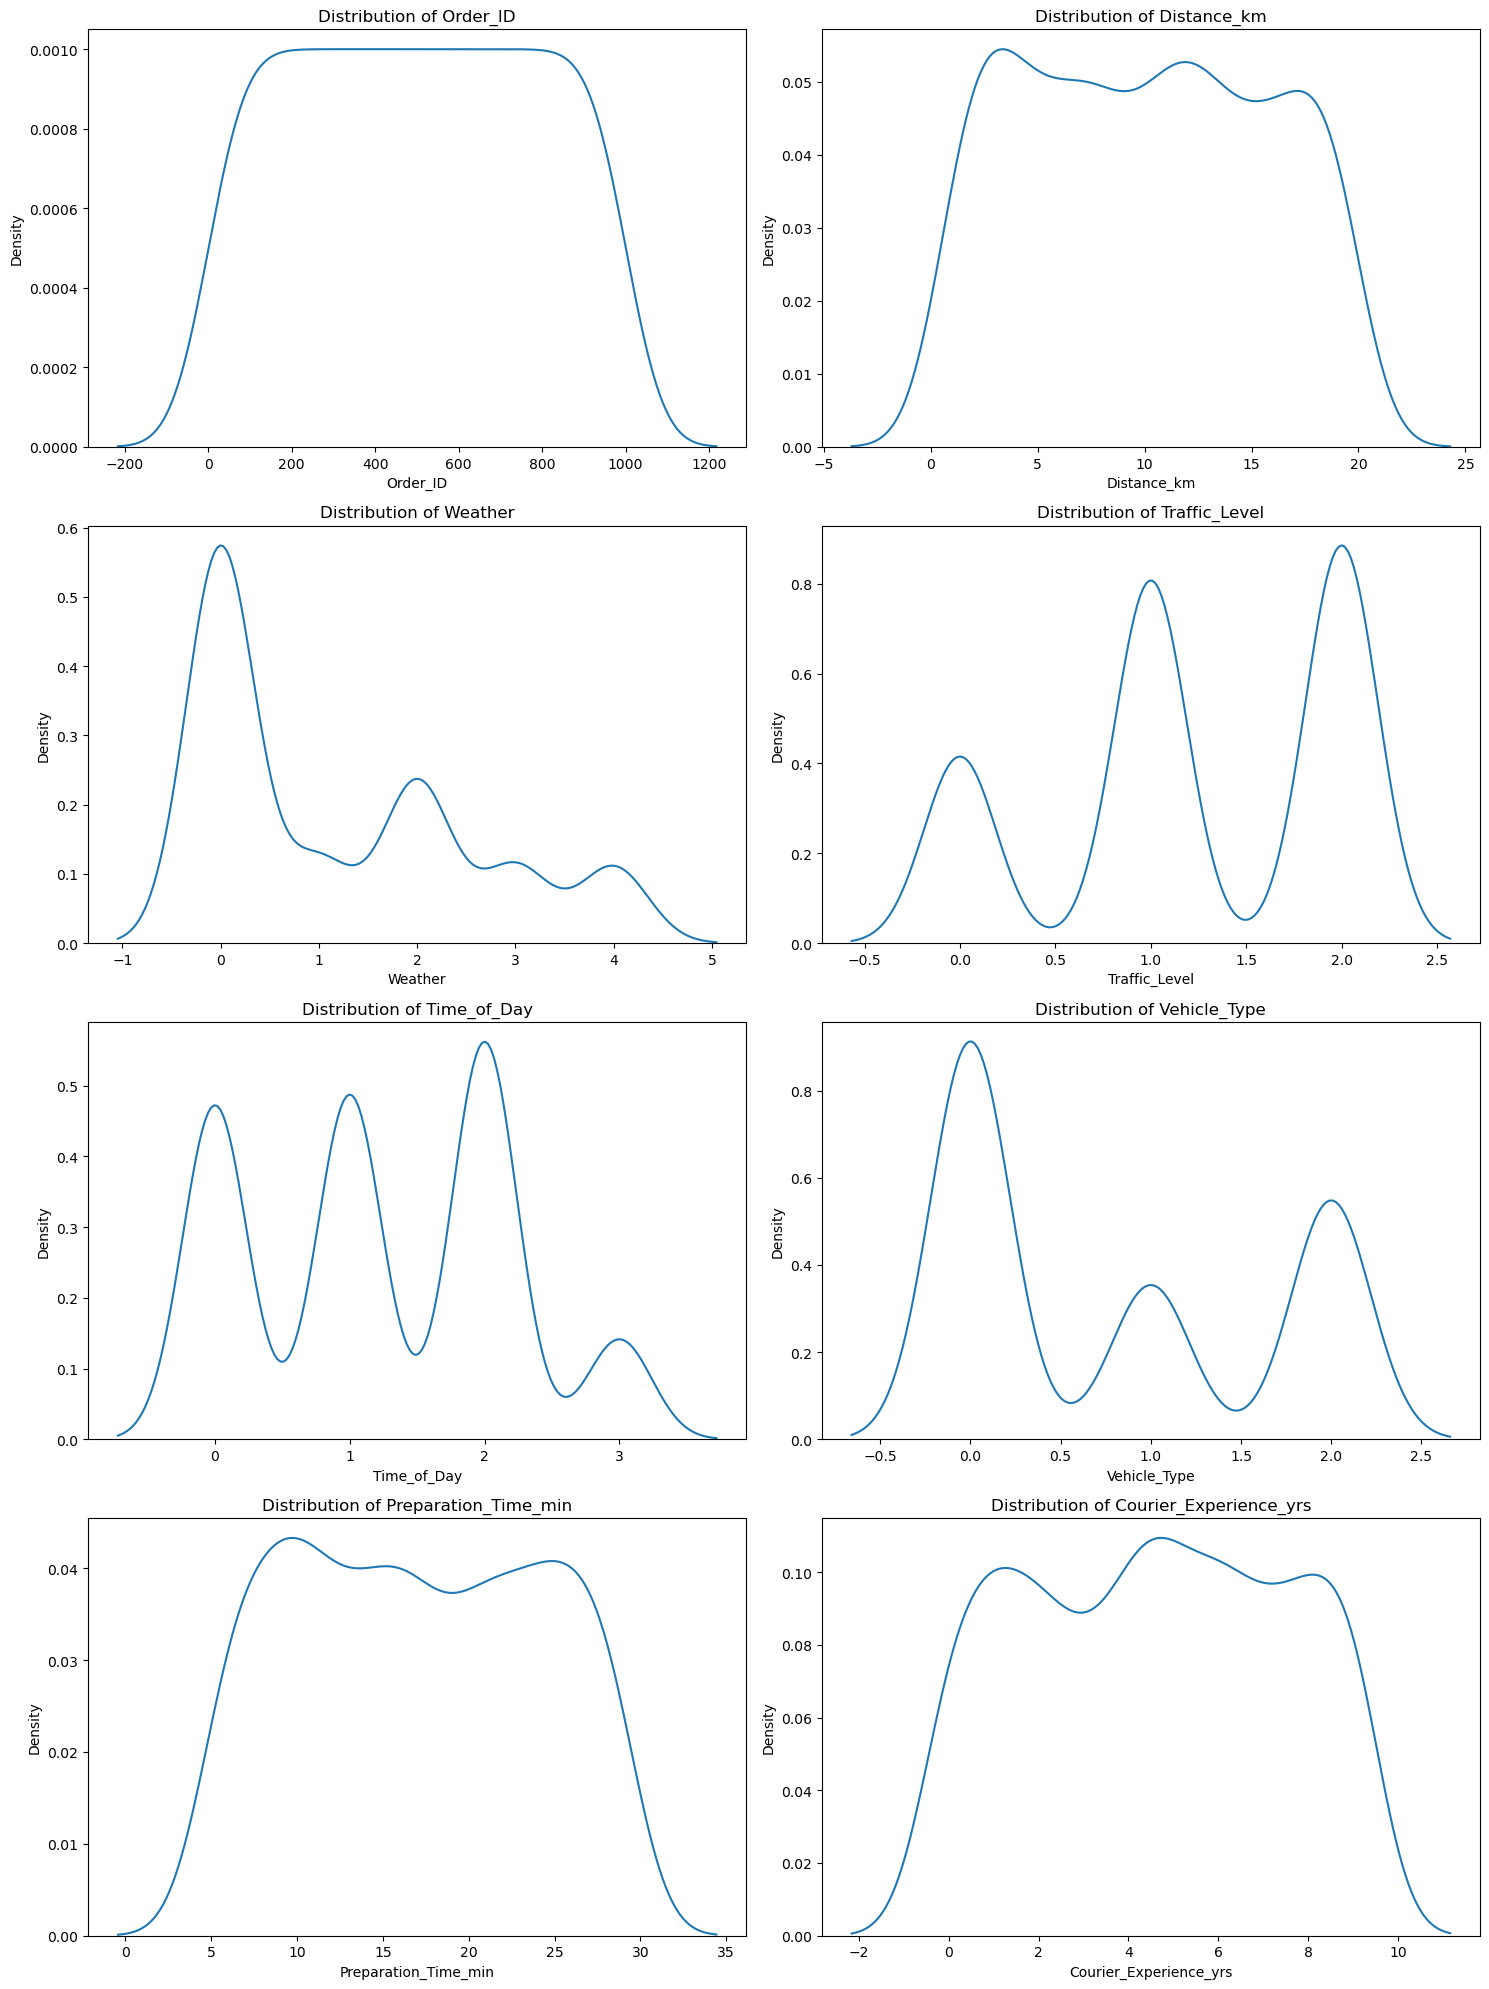


Top 3 most correlated features:
Delivery_Time_min       1.000000
Distance_km             0.780998
Preparation_Time_min    0.307350
Name: Delivery_Time_min, dtype: float64


In [184]:
correlations = analyze_relationships(df_encoded, 'Delivery_Time_min')  



print("\nTop 3 most correlated features:")

print(correlations[:3])

In [188]:
import matplotlib.pyplot as plt

X = df['Distance_km'].values.reshape(-1, 1)
y = df['Delivery_Time_min'].values

In [190]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

R-squared: 0.6099584361605346
Coefficient: 3.0258716764365823
Intercept: 26.291821711198274


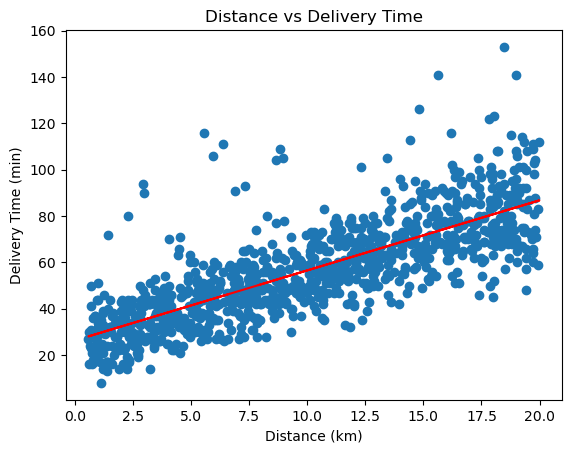

In [192]:
print('R-squared:', model.score(X, y))
print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

# Plot the results
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.title('Distance vs Delivery Time')
plt.show()

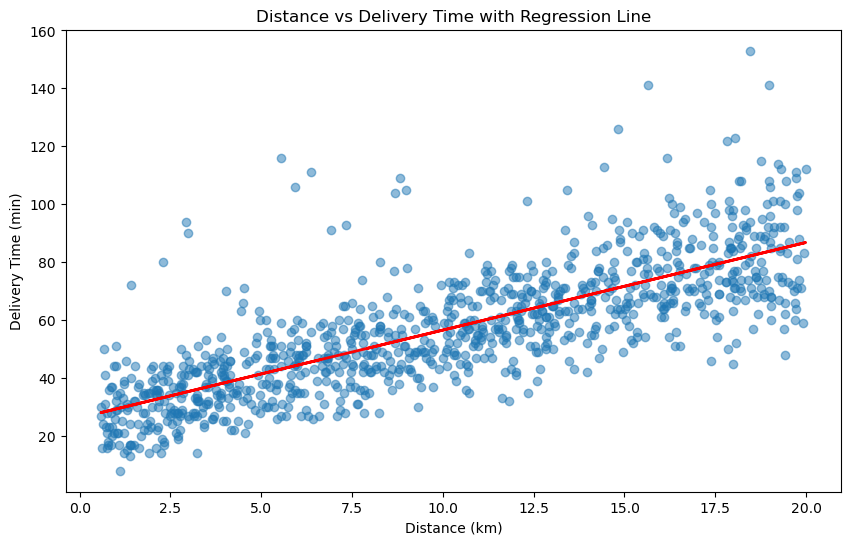

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


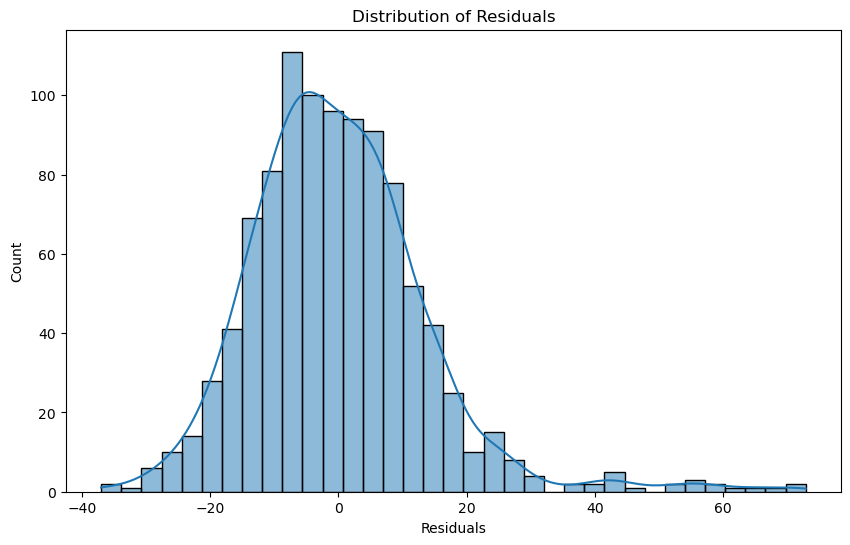

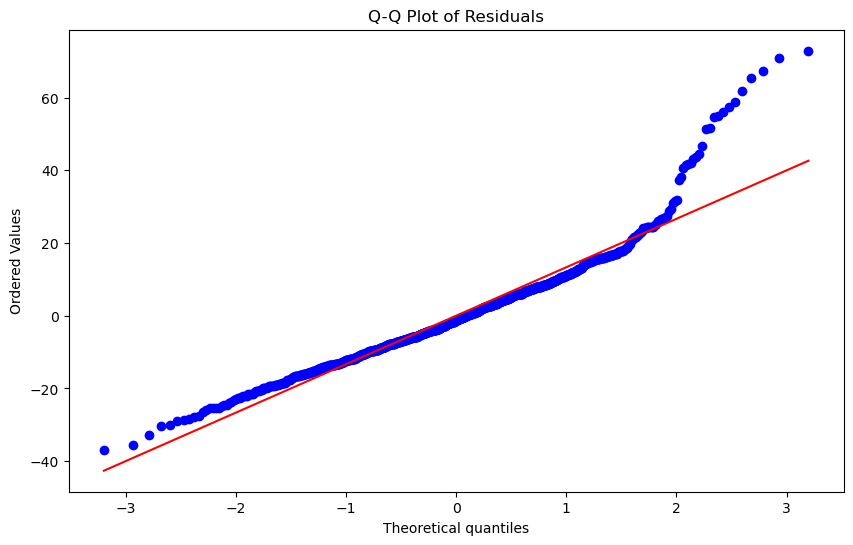


Regression Equation: y = 3.03x + 26.29
R-squared: 0.610


In [200]:
X = df['Distance_km'].values.reshape(-1, 1)
y = df['Delivery_Time_min'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Basic Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.title('Distance vs Delivery Time with Regression Line')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()

import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Print regression equation and R-squared
print(f"\nRegression Equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.3f}")

In [212]:


# Select features (X) and target (y)
X = df_encoded.drop('Delivery_Time_min', axis=1)
y = df_encoded['Delivery_Time_min']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

print('\nCoefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef:.2f}')

print(f'\nIntercept: {model.intercept_:.2f}')
print(f'\nR-squared (training): {model.score(X_train, y_train):.3f}')
print(f'R-squared (testing): {model.score(X_test, y_test):.3f}')

y_pred = model.predict(X_test)

mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
print(f'\nRoot Mean Square Error: {rmse:.2f}')


Coefficients:
Order_ID: -0.00
Distance_km: 3.01
Weather: 1.45
Traffic_Level: -1.77
Time_of_Day: -0.25
Vehicle_Type: -0.28
Preparation_Time_min: 0.97
Courier_Experience_yrs: -0.67

Intercept: 14.31

R-squared (training): 0.722
R-squared (testing): 0.756

Root Mean Square Error: 10.45


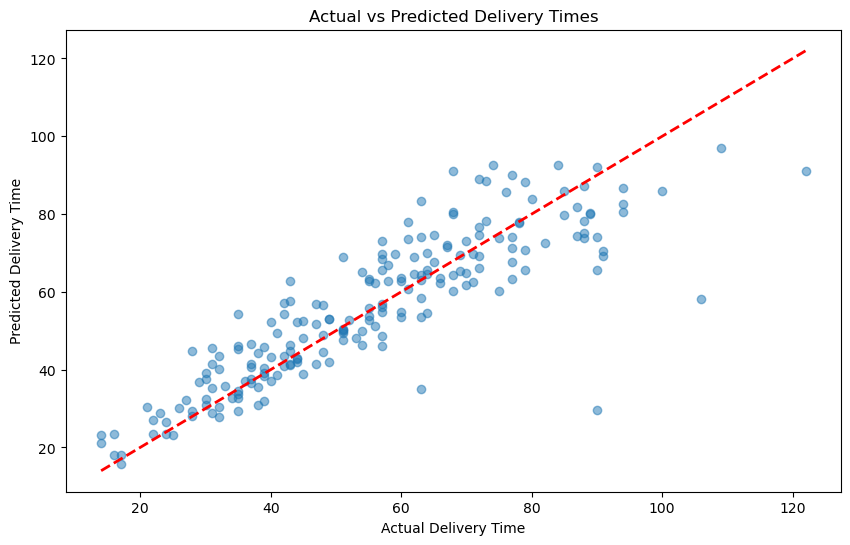

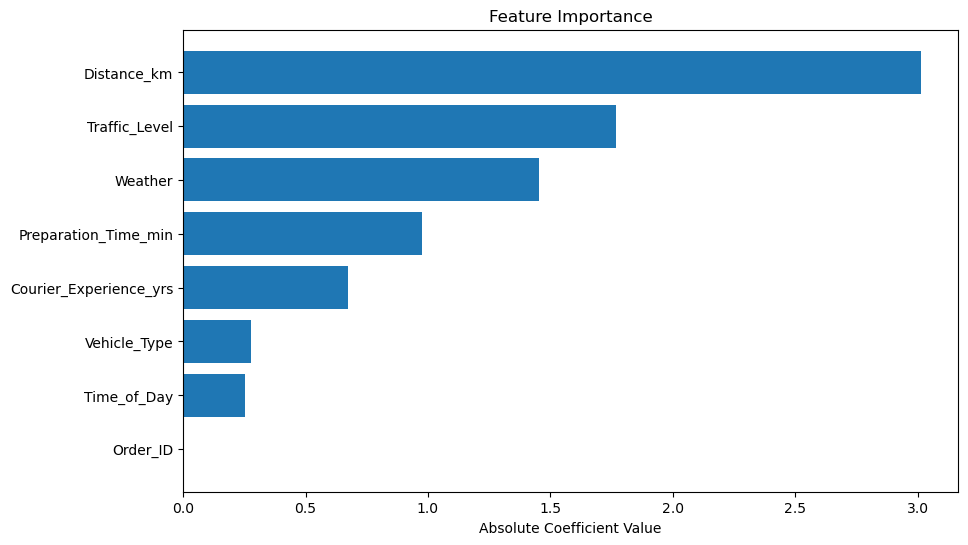

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


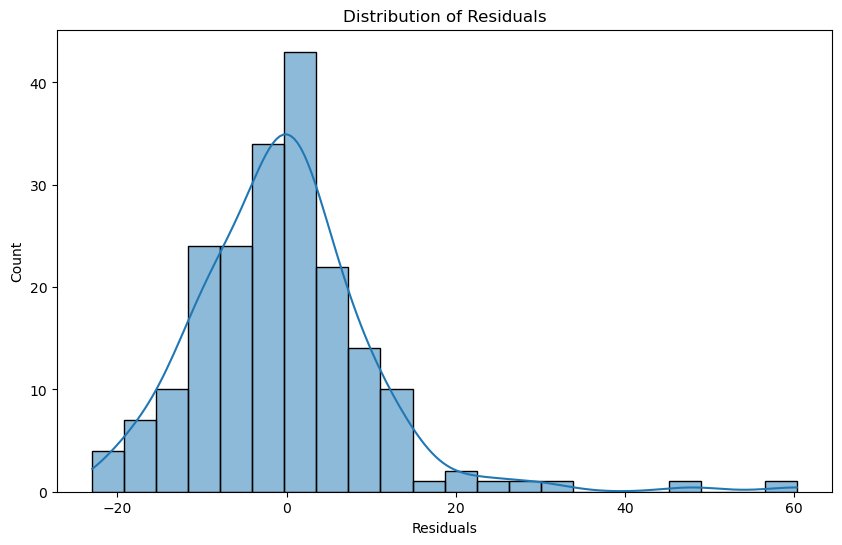

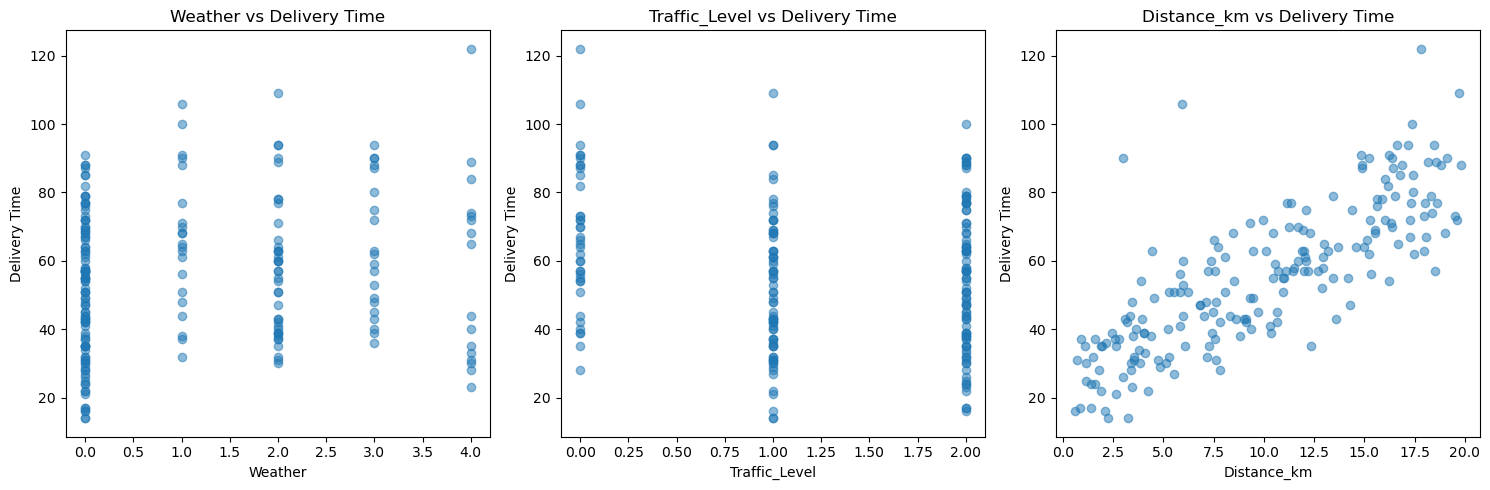

In [216]:


#  Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Times')
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 6))
features_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': abs(model.coef_)
})
features_importance = features_importance.sort_values('Coefficient', ascending=True)

plt.barh(features_importance['Feature'], features_importance['Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.show()

residuals = y_test - model.predict(X_test)


#  Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

#  Scatter plots for top features
top_features = features_importance.tail(3)['Feature'].values
fig, axes = plt.subplots(1, len(top_features), figsize=(15, 5))
for i, feature in enumerate(top_features):
    axes[i].scatter(X_test[feature], y_test, alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Delivery Time')
    axes[i].set_title(f'{feature} vs Delivery Time')
plt.tight_layout()
plt.show()